In [3]:
from astropy.modeling import models, Fittable1DModel, Parameter
from astropy.modeling.fitting import LevMarLSQFitter
import astropy.units as u
import astropy.constants as const
from astropy.io import fits

from spectacle.core.spectrum import Spectrum1D
from spectacle.modeling.custom import Masker
from spectacle.modeling.fitters import MCMCFitter
from spectacle.analysis.line_finder import LineFinder
from spectacle.io.registries import line_registry

import numpy as np
import matplotlib.pyplot as plt

In [7]:
%matplotlib notebook

In [4]:
wavelength = np.linspace(1200, 1235, 1000) * u.Angstrom
velocity = np.linspace(-400, 800, 1000) * u.Unit("km/s")

In [36]:
spectrum = Spectrum1D(ion='hi1215', redshift=0.0)

spectrum.add_line(v_doppler=6e6 * u.Unit('cm/s'), 
                  column_density=1e14 * u.Unit('1/cm2'))

spectrum.add_line(v_doppler=3e6 * u.Unit('cm/s'), 
                  column_density=1e14 * u.Unit('1/cm2'), 
                  delta_v=290 * u.Unit('km/s'))

INFO:root:Found line with name 'HI1216' from given name 'hi1215'.
INFO:root:Default continuum set to a Linear1D model.


In [42]:
dispersion = velocity
y = spectrum.optical_depth(dispersion)

<IPython.core.display.Javascript object>


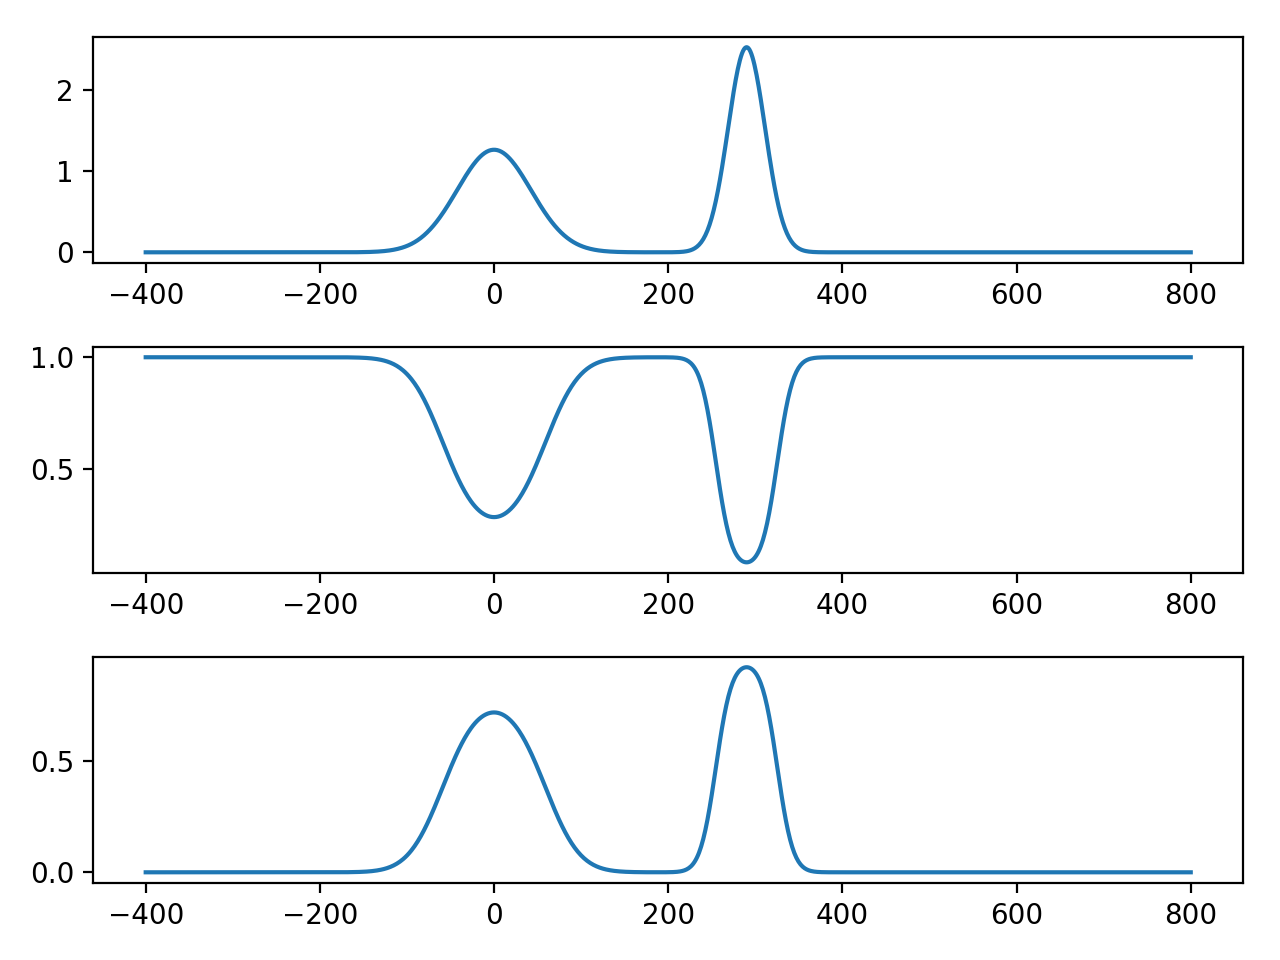

In [43]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1)

ax1.plot(dispersion, spectrum.optical_depth(dispersion))
ax2.plot(dispersion, spectrum.flux(dispersion))
ax3.plot(dispersion, spectrum.flux_decrement(dispersion))

f.tight_layout()